In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTENC

import tensorflow as tf
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *

# Utilitas
import os
from google.colab import drive
from google.colab import files

# Data

In [3]:
drive.mount('/content/drive')
googleDrivePath = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Dataset yang digunakan untuk melatih seluruh model/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_train = pd.read_csv(googleDrivePath + "Data_train.csv")
data_test = pd.read_csv(googleDrivePath + "Data_test.csv")

In [5]:
X_train = data_train.drop(columns=['class_0', 'class_1', 'class_2', 'class_3', 'class_4'])
y_train = data_train[['class_0', 'class_1', 'class_2', 'class_3', 'class_4']].values

X_test = data_test.drop(columns=['class_0', 'class_1', 'class_2', 'class_3', 'class_4'])
y_test = data_test[['class_0', 'class_1', 'class_2', 'class_3', 'class_4']].values

In [10]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [6]:
import joblib

labelEncoder = joblib.load(googleDrivePath + 'LabelEncoder.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [14]:
print("X_train Input:")
print(X_train.shape)

print("\ny_train Target:")
print(y_train.shape)

print("X_test Input:")
print(X_test.shape)

print("\ny_test Target:")
print(y_test.shape)

X_train Input:
(457834, 209)

y_train Target:
(457834,)
X_test Input:
(50871, 209)

y_test Target:
(50871,)


# Model

In [15]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=357)
logReg = LogisticRegression(random_state=357)

xgb.fit(X_train, y_train)
logReg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=357)

In [16]:
# Models for evaluation
models = [
    ("XGBoost", xgb),
    ("Logistik Reggresion", logReg)
]


XGBoost: (0.753868)

Confusion Matrix:
[[9650   48   34    9  420]
 [ 373 7008 1845  361  539]
 [  54 1383 6650 1550  607]
 [ 143  189 1016 6458 2273]
 [ 250  128  207 1092 8584]]


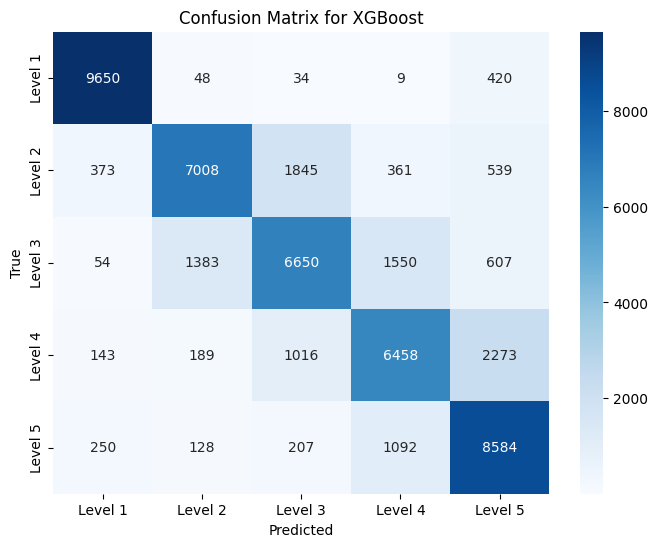


Classification Report:
              precision    recall  f1-score   support

     Level 1       0.92      0.95      0.94     10161
     Level 2       0.80      0.69      0.74     10126
     Level 3       0.68      0.65      0.67     10244
     Level 4       0.68      0.64      0.66     10079
     Level 5       0.69      0.84      0.76     10261

    accuracy                           0.75     50871
   macro avg       0.76      0.75      0.75     50871
weighted avg       0.76      0.75      0.75     50871

XGBoost Mean AUC: 0.94


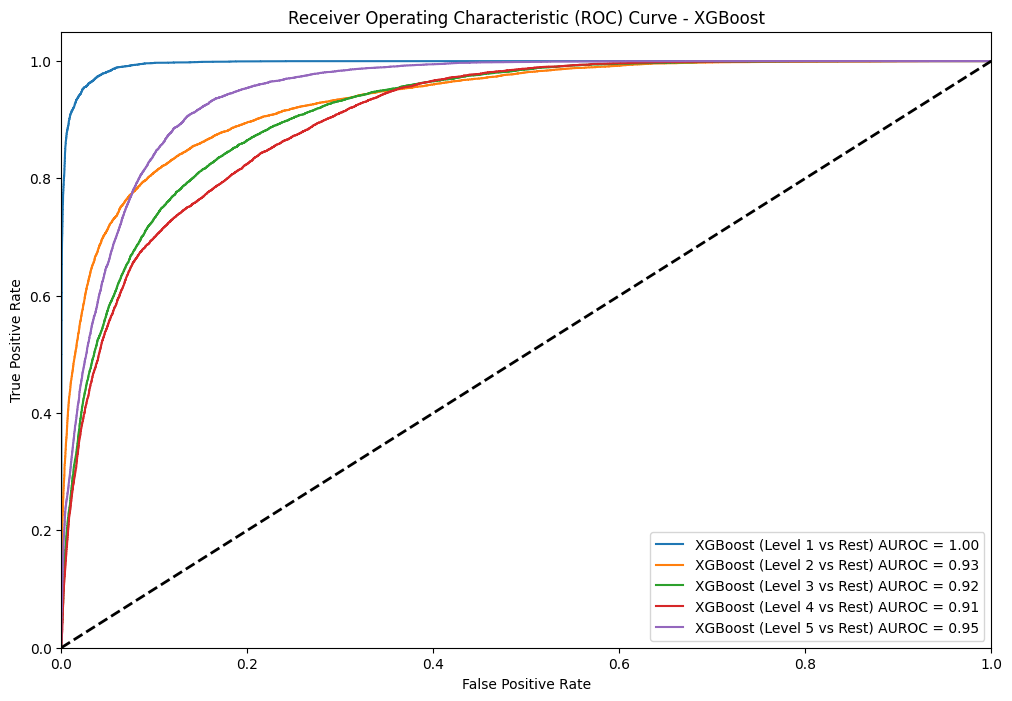

XGBoost AUROC Confidence Interval (95%): [0.95, 0.95]
Logistik Reggresion: (0.700301)

Confusion Matrix:
[[8622  141    0    1 1397]
 [ 781 6643 1761  364  577]
 [  69 2100 5666 1798  611]
 [ 348  186  735 6630 2180]
 [ 853   96   74 1174 8064]]


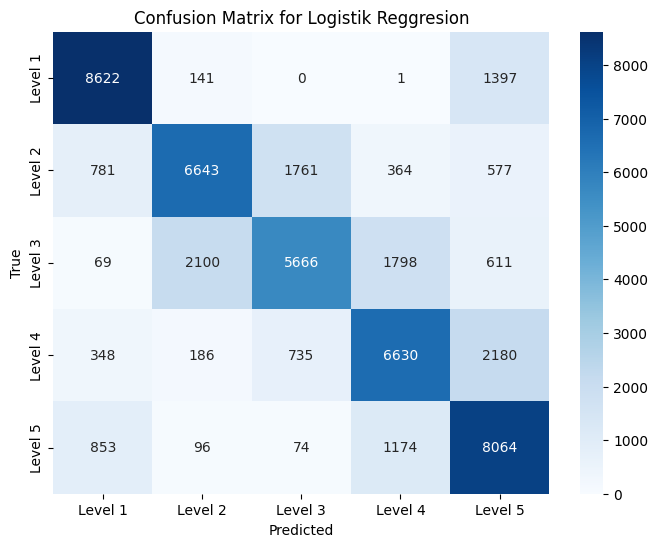


Classification Report:
              precision    recall  f1-score   support

     Level 1       0.81      0.85      0.83     10161
     Level 2       0.72      0.66      0.69     10126
     Level 3       0.69      0.55      0.61     10244
     Level 4       0.67      0.66      0.66     10079
     Level 5       0.63      0.79      0.70     10261

    accuracy                           0.70     50871
   macro avg       0.70      0.70      0.70     50871
weighted avg       0.70      0.70      0.70     50871

Logistik Reggresion Mean AUC: 0.92


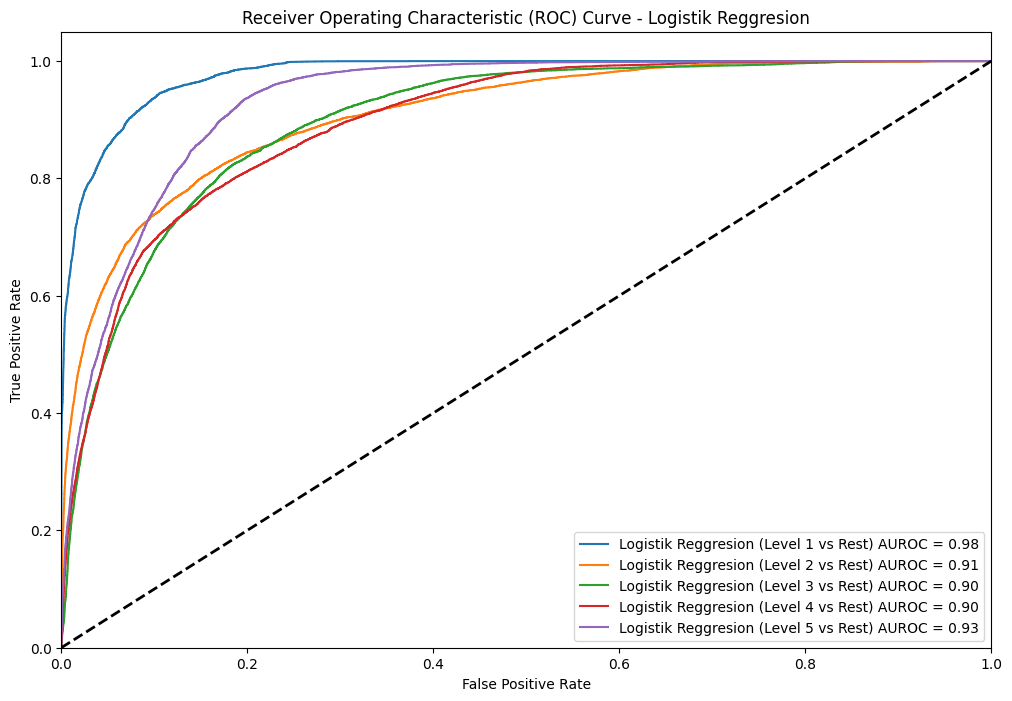

Logistik Reggresion AUROC Confidence Interval (95%): [0.93, 0.93]


In [17]:
labels = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']

# Evaluate models
for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = f"{name}: ({acc:.6f})"
    print("=============================================================")
    print(msg)
    print("=============================================================")

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:')
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print classification report with new labels
    class_report = classification_report(y_test, y_pred, target_names=labels)
    print('\nClassification Report:')
    print(class_report)

    # Calculate and plot AUROC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        # For models that do not have predict_proba (e.g., SVM without probability=True), use decision function
        y_prob = model.decision_function(X_test)

    # Binarize y_test for multi-class ROC AUC
    y_test_binarized = label_binarize(y_test, classes=range(len(labels)))

    plt.figure(figsize=(12, 8))
    aucs = []
    for i in range(len(labels)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, label=f'{name} (Level {i+1} vs Rest) AUROC = {roc_auc:.2f}')

    mean_auc = np.mean(aucs)
    print(f'{name} Mean AUC: {mean_auc:.2f}')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

    # Bootstrapping for confidence interval
    n_bootstraps = 1000
    rng_seed = 42  # Seed for reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        indices = rng.randint(0, len(y_prob), len(y_prob))
        if len(np.unique(y_test_binarized[indices])) < 2:
            # Skip the iteration if the sample does not have at least two classes
            continue

        fpr_boot, tpr_boot, _ = roc_curve(y_test_binarized[indices].ravel(), y_prob[indices].ravel())
        score = auc(fpr_boot, tpr_boot)
        bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Compute the confidence interval
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]

    print(f'{name} AUROC Confidence Interval (95%): [{confidence_lower:.2f}, {confidence_upper:.2f}]')


In [18]:
# Jika y_test bukan biner, kita perlu binarize labelnya
n_classes = len(set(y_test))
y_test_binarized = label_binarize(y_test, classes=[*range(n_classes)])

# Menghitung probabilitas prediksi
xgb_prob = xgb.predict_proba(X_test)
logReg_prob = logReg.predict_proba(X_test)

# Menghitung nilai AUC untuk setiap kelas dan rata-rata
xgb_auc = roc_auc_score(y_test_binarized, xgb_prob, multi_class='ovr', average='macro')
logReg_auc = roc_auc_score(y_test_binarized, logReg_prob, multi_class='ovr', average='macro')

print("AUC XGBoost: ", xgb_auc)
print("AUC Logistic Regression: ", logReg_auc)

AUC XGBoost:  0.9395501902145538
AUC Logistic Regression:  0.9228864656751516
